<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Par%C3%A7a_%C3%9CretimindeTahminleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parça Üretiminde Tahminleme (Demand Forecasting) → Müşteri siparişleri ve üretim kapasitelerine göre talepleri tahmin eden model




Adım 1: Sentetik Veri Oluşturma


In [ ]:
import pandas as pd
import numpy as np

# Sentetik veri oluşturma
np.random.seed(42)  # Tutarlılık için random seed ayarla

# Tarih aralığı (2 yıllık günlük veri)
tarihler = pd.date_range(start="2022-01-01", end="2023-12-31", freq="D")

# Temel talep (rastgele bir başlangıç)
temel_talep = np.random.randint(50, 200, size=len(tarihler))

# Mevsimsellik etkisi (yaz aylarında talep artışı)
mevsimsellik = 50 * np.sin(2 * np.pi * (tarihler.dayofyear / 365))  # Sinüs dalgası ile mevsimsellik

# Promosyon etkisi (rastgele promosyon günleri)
promosyon = np.random.choice([0, 1], size=len(tarihler), p=[0.7, 0.3])  # %30 promosyon olasılığı
promosyon_etkisi = promosyon * np.random.randint(20, 50, size=len(tarihler))  # Promosyon talep artışı

# Fiyat etkisi (fiyat arttıkça talep azalır)
fiyat = np.random.uniform(10, 100, size=len(tarihler))
fiyat_etkisi = -0.5 * fiyat  # Fiyat arttıkça talep azalır

# Ürün kategorisi (rastgele seçim)
urun_kategorisi = np.random.choice(["Elektronik", "Giyim", "Ev Eşyaları"], size=len(tarihler))

# Toplam talep (temel talep + mevsimsellik + promosyon etkisi + fiyat etkisi)
talep = temel_talep + mevsimsellik + promosyon_etkisi + fiyat_etkisi

# Veriyi DataFrame'e dönüştürme
data = pd.DataFrame({
    "Tarih": tarihler,
    "Talep": talep,
    "Ürün Kategorisi": urun_kategorisi,
    "Fiyat": fiyat,
    "Promosyon": promosyon
})

# Veriyi CSV olarak kaydet (isteğe bağlı)
data.to_csv("sentetik_talep_verisi.csv", index=False)

# Veriyi göster
print(data.head())

       Tarih       Talep Ürün Kategorisi      Fiyat  Promosyon
0 2022-01-01  138.176584           Giyim  29.368168          0
1 2022-01-02  138.175646           Giyim  11.090870          0
2 2022-01-03   50.726918           Giyim  31.708131          0
3 2022-01-04  110.525802      Elektronik  97.828638          0
4 2022-01-05   84.229070     Ev Eşyaları  82.138340          0


Adım 2: Veriyi İnceleme
Oluşturduğumuz sentetik veri setini inceleyelim.

Adım 3: Veri Ön İşleme
Veriyi analiz ve modelleme için hazır hale getirelim.

In [ ]:
# Tarih özelliklerini çıkaralım (yıl, ay, gün)
data["Yıl"] = data["Tarih"].dt.year
data["Ay"] = data["Tarih"].dt.month
data["Gün"] = data["Tarih"].dt.day

# Kategorik değişkenleri sayısallaştırma (One-Hot Encoding)
data = pd.get_dummies(data, columns=["Ürün Kategorisi"], drop_first=True)

# Veriyi göster
print(data.head())

       Tarih       Talep      Fiyat  Promosyon   Yıl  Ay  Gün  \
0 2022-01-01  138.176584  29.368168          0  2022   1    1   
1 2022-01-02  138.175646  11.090870          0  2022   1    2   
2 2022-01-03   50.726918  31.708131          0  2022   1    3   
3 2022-01-04  110.525802  97.828638          0  2022   1    4   
4 2022-01-05   84.229070  82.138340          0  2022   1    5   

   Ürün Kategorisi_Ev Eşyaları  Ürün Kategorisi_Giyim  
0                        False                   True  
1                        False                   True  
2                        False                   True  
3                        False                  False  
4                         True                  False  


Adım 4: Veri Analizi (EDA)
Veriyi görselleştirerek trendleri ve mevsimselliği inceleyelim

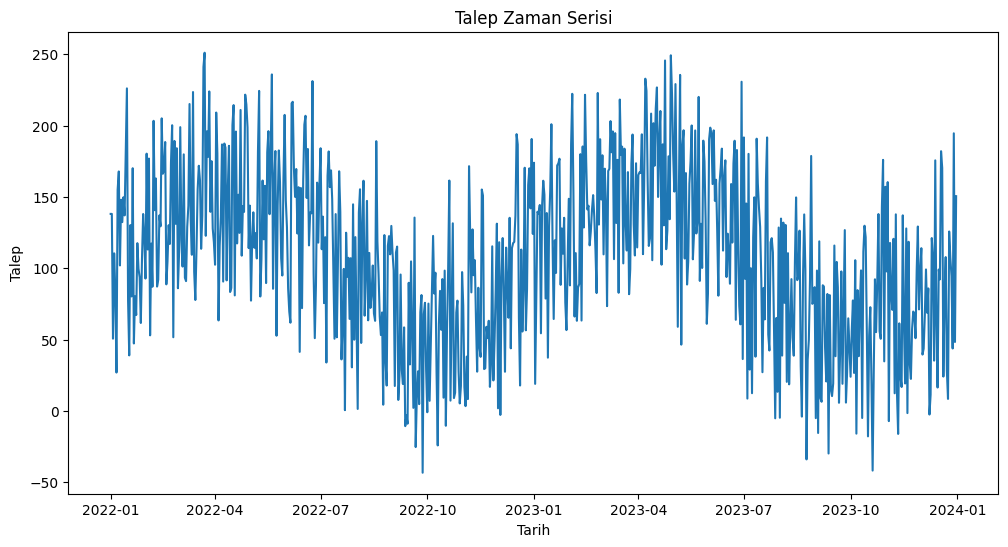

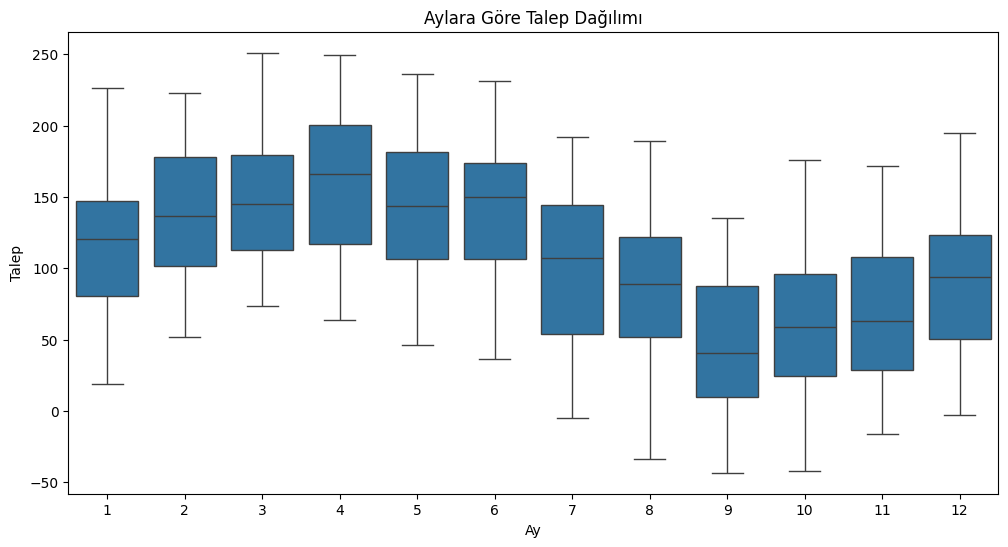

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Talep zaman serisi grafiği
plt.figure(figsize=(12, 6))
plt.plot(data["Tarih"], data["Talep"])
plt.title("Talep Zaman Serisi")
plt.xlabel("Tarih")
plt.ylabel("Talep")
plt.show()

# Mevsimsellik etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x="Ay", y="Talep", data=data)
plt.title("Aylara Göre Talep Dağılımı")
plt.xlabel("Ay")
plt.ylabel("Talep")
plt.show()

Adım 5: Model Geliştirme
Basit bir Lineer Regresyon modeli ile başlayalım

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Özellikler ve hedef değişken
X = data.drop(["Talep", "Tarih"], axis=1)
y = data["Talep"]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğitimi
model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Model değerlendirme
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 45.16561842802803, RMSE: 54.08368844309894


Adım 6: Sonuçların Değerlendirilmesi
1. Hata Metriklerini Hesaplama
Modelin performansını ölçmek için aşağıdaki metrikleri kullanacağız:

MAE (Mean Absolute Error): Tahminler ile gerçek değerler arasındaki ortalama mutlak fark.

RMSE (Root Mean Squared Error): Tahminler ile gerçek değerler arasındaki ortalama kare farkının karekökü.

MAPE (Mean Absolute Percentage Error): Tahminlerin gerçek değerlere göre yüzde olarak ne kadar sapma gösterdiği.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hata metriklerini hesapla
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE hesaplama
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Sonuçları yazdır
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 45.16561842802803
RMSE: 54.08368844309894
MAPE: 173.39685439367486%


2. Gerçek vs. Tahmin Grafiği
Modelin tahminlerini gerçek değerlerle karşılaştırarak görselleştirelim. Bu, modelin nerede iyi performans gösterdiğini ve nerede hata yaptığını anlamamıza yardımcı olur.

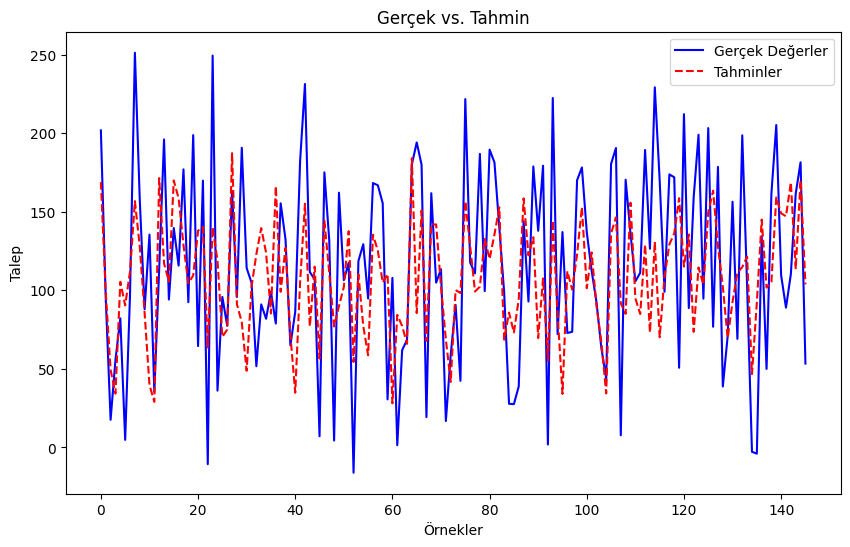

In [ ]:
import matplotlib.pyplot as plt

# Gerçek vs. Tahmin grafiği
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Gerçek Değerler", color="blue")
plt.plot(y_pred, label="Tahminler", color="red", linestyle="--")
plt.title("Gerçek vs. Tahmin")
plt.xlabel("Örnekler")
plt.ylabel("Talep")
plt.legend()
plt.show()

Grafik Yorumu:
Mavi çizgi, gerçek talep değerlerini gösterir.

Kırmızı kesikli çizgi, modelin tahminlerini gösterir.

İki çizgi ne kadar yakınsa, model o kadar iyi performans gösteriyor demektir.

3. Hata Dağılımını İnceleme
Tahmin hatalarının dağılımını inceleyerek modelin tutarlılığını değerlendirebiliriz.

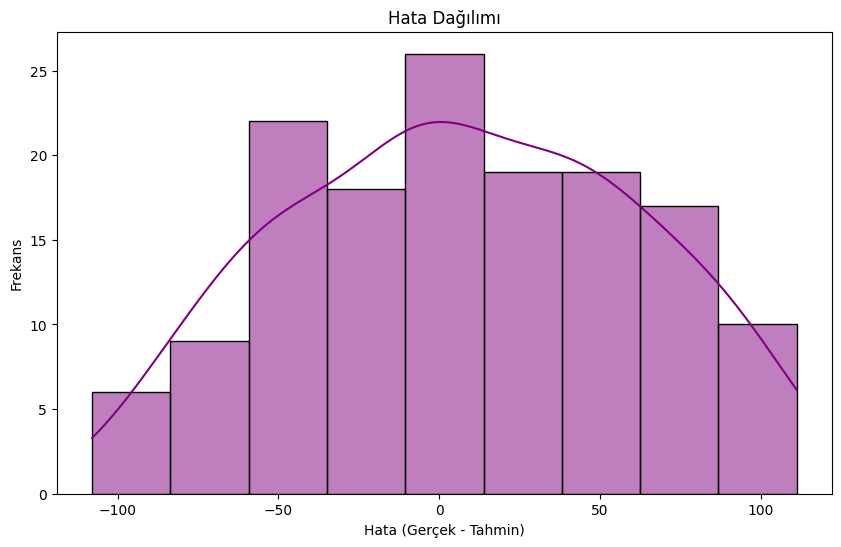

In [ ]:
# Hata dağılımı
hata = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(hata, kde=True, color="purple")
plt.title("Hata Dağılımı")
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")
plt.show()

Grafik Yorumu:
Hatalar sıfıra yakın ve simetrik bir dağılım gösteriyorsa, model iyi performans gösteriyor demektir.

Hatalar büyükse veya asimetrikse, modelin iyileştirilmesi gerekir.

4. Model Katsayılarını İnceleme (Lineer Regresyon İçin)
Eğer Lineer Regresyon gibi bir model kullandıysanız, modelin katsayılarını inceleyerek hangi özelliklerin talebi ne kadar etkilediğini anlayabilirsiniz.

In [ ]:
# Model katsayılarını göster
katsayilar = pd.DataFrame({
    "Özellik": X.columns,
    "Katsayı": model.coef_
})
print(katsayilar)

                       Özellik    Katsayı
0                        Fiyat  -0.587950
1                    Promosyon  31.180786
2                          Yıl  -3.640868
3                           Ay  -8.176163
4                          Gün   0.039543
5  Ürün Kategorisi_Ev Eşyaları  -3.086979
6        Ürün Kategorisi_Giyim  -0.543813


Fiyat: Fiyat arttıkça talep azalır (negatif katsayı).

Promosyon: Promosyon olduğunda talep artar (pozitif katsayı).

Ürün Kategorisi: Bazı kategoriler diğerlerine göre daha fazla talep çeker.

5. Model İyileştirme Önerileri
Daha İyi Modeller: Lineer Regresyon yerine Random Forest, XGBoost veya LSTM gibi daha karmaşık modeller deneyebilirsiniz.

Daha Fazla Veri: Veri setinizi genişletebilirsiniz.

Özellik Mühendisliği: Yeni özellikler ekleyebilir veya mevcut özellikleri dönüştürebilirsiniz.

Hiperparametre Optimizasyonu: Modelin hiperparametrelerini ayarlayarak performansını artırabilirsiniz.

Adım 7: Modeli İyileştirme
1. Daha İyi Modeller Deneme
Lineer Regresyon gibi basit bir modelle başladık, ancak daha karmaşık modeller deneyerek performansı artırabiliriz. İşte deneyebileceğimiz bazı modeller:

Random Forest: Ağaç tabanlı bir modeldir, özellikle doğrusal olmayan ilişkileri yakalamada iyidir.

XGBoost: Gradient Boosting tabanlı bir modeldir, yarışmalarda sıkça kullanılır.

LSTM: Zaman serisi verileri için özel olarak tasarlanmış bir derin öğrenme modelidir.

Örnek olarak Random Forest modelini deneyelim:



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf_model.predict(X_test)

# Hata metriklerini hesapla
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAPE: {mape_rf}%")

Random Forest MAE: 43.33369815381396
Random Forest RMSE: 50.196398768601505
Random Forest MAPE: 146.30793075479468%


2. Hiperparametre Optimizasyonu
Modelin hiperparametrelerini optimize ederek performansını artırabiliriz. Örneğin, Random Forest için n_estimators, max_depth gibi parametreleri ayarlayabiliriz. Bunun için Grid Search veya Random Search kullanabiliriz.

Grid Search Örneği:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre aralıkları
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid_search.best_params_)

# En iyi modelle tahmin yapma
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Hata metriklerini hesapla
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mape_best = mean_absolute_percentage_error(y_test, y_pred_best)

print(f"Optimize Edilmiş Model MAE: {mae_best}")
print(f"Optimize Edilmiş Model RMSE: {rmse_best}")
print(f"Optimize Edilmiş Model MAPE: {mape_best}%")

En iyi parametreler: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Optimize Edilmiş Model MAE: 43.64226059035007
Optimize Edilmiş Model RMSE: 50.525805817216416
Optimize Edilmiş Model MAPE: 152.37985808692196%


3. Özellik Mühendisliği
Mevcut özellikleri dönüştürerek veya yeni özellikler ekleyerek modelin performansını artırabiliriz. Örneğin:

Mevsimsel Özellikler: Yılın hangi ayında olduğumuzu gösteren özellikler ekleyebiliriz.

Lag Özellikleri: Geçmiş talep değerlerini kullanarak yeni özellikler oluşturabiliriz.

Etkileşim Özellikleri: Örneğin, fiyat ve promosyonun etkileşimini temsil eden bir özellik ekleyebiliriz.

Örnek: Lag Özelliği Ekleme

In [ ]:
# Lag özelliği ekleme (1 gün önceki talep)
data["Lag_1"] = data["Talep"].shift(1)

# Eksik verileri doldurma
data.fillna(0, inplace=True)

# Yeni özelliklerle modeli tekrar eğitme
X = data.drop(["Talep", "Tarih"], axis=1)
y = data["Talep"]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tekrar eğitme
rf_model.fit(X_train, y_train)

# Tahminler
y_pred_lag = rf_model.predict(X_test)

# Hata metriklerini hesapla
mae_lag = mean_absolute_error(y_test, y_pred_lag)
rmse_lag = np.sqrt(mean_squared_error(y_test, y_pred_lag))
mape_lag = mean_absolute_percentage_error(y_test, y_pred_lag)

print(f"Lag Özelliği ile MAE: {mae_lag}")
print(f"Lag Özelliği ile RMSE: {rmse_lag}")
print(f"Lag Özelliği ile MAPE: {mape_lag}%")

Lag Özelliği ile MAE: 44.305392586595865
Lag Özelliği ile RMSE: 52.13950363945574
Lag Özelliği ile MAPE: 160.38812894241477%


4. Daha Fazla Veri Toplama
Modelin performansını artırmanın en etkili yollarından biri daha fazla veri toplamaktır. Örneğin:

Daha uzun bir zaman aralığına ait veri toplayabilirsiniz.

Dış faktörler (örneğin, hava durumu, ekonomik göstergeler) ekleyebilirsiniz.

5. Model Karşılaştırması
Farklı modellerin performansını karşılaştırarak en iyi modeli seçebiliriz.

In [ ]:
# Model performanslarını karşılaştırma
results = {
    "Lineer Regresyon": {"MAE": mae, "RMSE": rmse, "MAPE": mape},
    "Random Forest": {"MAE": mae_rf, "RMSE": rmse_rf, "MAPE": mape_rf},
    "Optimize Edilmiş RF": {"MAE": mae_best, "RMSE": rmse_best, "MAPE": mape_best},
    "Lag Özelliği ile RF": {"MAE": mae_lag, "RMSE": rmse_lag, "MAPE": mape_lag}
}

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results)
print(results_df)

      Lineer Regresyon  Random Forest  Optimize Edilmiş RF  \
MAE          45.165618      43.333698            43.642261   
RMSE         54.083688      50.196399            50.525806   
MAPE        173.396854     146.307931           152.379858   

      Lag Özelliği ile RF  
MAE             44.305393  
RMSE            52.139504  
MAPE           160.388129  


1. XGBoost Modeli
XGBoost, gradient boosting algoritmasına dayanan güçlü bir makine öğrenmesi modelidir. Hem hızlı hem de yüksek performanslıdır.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# XGBoost modeli
xgb_model = xgb.XGBRegressor(
    n_estimators=100,  # Ağaç sayısı
    learning_rate=0.1,  # Öğrenme oranı
    max_depth=5,  # Ağaç derinliği
    random_state=42
)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Tahminler
y_pred_xgb = xgb_model.predict(X_test)

# Hata metriklerini hesapla
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAPE: {mape_xgb}%")

XGBoost MAE: 46.00199940723941
XGBoost RMSE: 54.10002613930571
XGBoost MAPE: 178.00045659755855%


Modeli Kaydetme
Geliştirdiğiniz modeli kaydederek daha sonra kullanmak üzere saklayabilirsiniz. Bu, modeli yeniden eğitmek zorunda kalmadan tahminler yapmanızı sağlar.

In [ ]:
import joblib

# XGBoost modelini kaydet
joblib.dump(xgb_model, "xgboost_talep_tahmini_modeli.pkl")

['xgboost_talep_tahmini_modeli.pkl']